In [ ]:
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np 
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Twitter api credentials
ConsumerKey       =  'PJHKZkuz3S11A8TALtvN8oCo9'
ConsumerSecret    =  '9Bfnu5S8WdK71O08ZdHd7Wa2H5CG2QpMWSCVkLzrQ6EymKIzfy'
accessToken       =  '1223257823141777408-ChNcuKATurPQaJS0BPymBhdeA4thCi'
accessTokenSecret =  '0vl7PnwSRMqjwshmvrKPKipDqiRMN70JIsYLKTuaD2Q7Z'

In [ ]:
#Create the Authentication object
authenticate  = tweepy.OAuthHandler(ConsumerKey,ConsumerSecret)

#set the access token
authenticate.set_access_token(accessToken,accessTokenSecret)

#create the api object while passing in the authenticate information
api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [ ]:
#multiple list carries different info. of fetched tweet
tweets_text = []
tweets_id= []
tweets_date = []
tweets_time = []
tweets_retweet_count = []
#fetching live tweets from twitter
try:
# Pulling individual tweets from query
    i=0
    for tweet in tweepy.Cursor(api.search , q='#covid19 -filter:retweets '  , count=100 , lang='en').items():
# Adding to list that contains all tweets
      tweets_text.append((tweet.text))
      tweets_id.append(tweet.id)
      tweets_date.append(tweet.created_at.date())
      tweets_time.append(tweet.created_at.time())
      tweets_retweet_count.append(tweet.retweet_count)
      i=i+1
      if i == 10000:
        break
      else:
        pass
except BaseException as e:
    print('failed on_status,',str(e))





In [ ]:
#creating dataframe of tweet_text
twitter_df_text = pd.DataFrame(tweets_text,columns=['Tweet'])

#df of id 
twitter_df_id = pd.DataFrame(tweets_id,columns=['id'])

#df of date
twitter_df_date = pd.DataFrame(tweets_date,columns=['Date'])

#df of time
twitter_df_time = pd.DataFrame(tweets_time,columns=['Time'])

#df of retweet_count
twitter_df_retweet_count = pd.DataFrame(tweets_retweet_count,columns=['Retweet_count'])


In [ ]:
#concatenating all the sub dataframes
twitter_df = pd.concat([twitter_df_id,twitter_df_date,twitter_df_time,twitter_df_text,twitter_df_retweet_count],axis=1)
twitter_df.info()
twitter_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             10000 non-null  int64 
 1   Date           10000 non-null  object
 2   Time           10000 non-null  object
 3   Tweet          10000 non-null  object
 4   Retweet_count  10000 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 390.8+ KB


,id,Date,Time,Tweet,Retweet_count
0,1281108228797947904,2020-07-09,06:09:38,@SkyNewsAust @adamkraymond @MichaelPascoe01 @W...,0
1,1281108212016484352,2020-07-09,06:09:34,Going up stairs without using the banister to ...,0
2,1281108204072497153,2020-07-09,06:09:32,State Health Department reports 149 #COVID19 c...,0
3,1281108192030683136,2020-07-09,06:09:29,@TouringPlans But are they refundable if #COVI...,0
4,1281108186209021952,2020-07-09,06:09:28,"#tiktok #instagramreels that’s how, who baby 👶...",0


In [ ]:
#removing mentioned people
import re
for i in range(len(twitter_df['Tweet'])):
  twitter_df['Tweet'][i] = re.sub(r'@[A-Za-z0-9_A-Za-z0-9]+', '', twitter_df['Tweet'][i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
#to remove special characters and punctuation
spcl_char = [ '#' , '@' , '$'  , '*' , ':' , ';' , '?' , '/' ,  '!' , '|' , '\n' , '¿' , '\n' , ',' ,  '!' , ' " ','(' , ')' ,'+','-','<', '=', '>' , '[', ' \ ',']',' ` ',
             '{ ', '|' , '}',' ~ '] 
def char_remove():
  for char in spcl_char:
    twitter_df['Tweet']  = twitter_df['Tweet'].str.replace(char,"")
  return twitter_df['Tweet']
char_remove()
twitter_df.head(5)

,id,Date,Time,Tweet,Retweet_count
0,1281108228797947904,2020-07-09,06:09:38,Rightly condem the soulless AynRandian Robotro...,0
1,1281108212016484352,2020-07-09,06:09:34,Going up stairs without using the banister to ...,0
2,1281108204072497153,2020-07-09,06:09:32,State Health Department reports 149 COVID19 ca...,0
3,1281108192030683136,2020-07-09,06:09:29,But are they refundable if COVID19 is still a...,0
4,1281108186209021952,2020-07-09,06:09:28,tiktok instagramreels that’s how who baby 👶 ju...,0


In [ ]:
#removing link in Tweet if present
twitter_df['Tweet'] = twitter_df['Tweet'].str.replace('http\S+|www.\S+', '', case=False)
twitter_df.head(5)


,id,Date,Time,Tweet,Retweet_count
0,1281108228797947904,2020-07-09,06:09:38,Rightly condem the soulless AynRandian Robotro...,0
1,1281108212016484352,2020-07-09,06:09:34,Going up stairs without using the banister to ...,0
2,1281108204072497153,2020-07-09,06:09:32,State Health Department reports 149 COVID19 ca...,0
3,1281108192030683136,2020-07-09,06:09:29,But are they refundable if COVID19 is still a...,0
4,1281108186209021952,2020-07-09,06:09:28,tiktok instagramreels that’s how who baby 👶 ju...,0


In [ ]:
#to remove ascii characters
twitter_df['Tweet']  = twitter_df['Tweet'].str.replace("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", '')
twitter_df.head()

,id,Date,Time,Tweet,Retweet_count
0,1281108228797947904,2020-07-09,06:09:38,Rightly condem the soulless AynRandian Robotro...,0
1,1281108212016484352,2020-07-09,06:09:34,Going up stairs without using the banister to ...,0
2,1281108204072497153,2020-07-09,06:09:32,State Health Department reports 149 COVID19 ca...,0
3,1281108192030683136,2020-07-09,06:09:29,But are they refundable if COVID19 is still a...,0
4,1281108186209021952,2020-07-09,06:09:28,tiktok instagramreels that’s how who baby jus...,0


In [ ]:
#adding polarity and subjectivity
from textblob import sentiments
def getpolarity(text):
    blob = TextBlob(text)
    sent = blob.sentiment.polarity
    return sent

def getsubjectivity(text):
    blob = TextBlob(text)
    sent = blob.sentiment.subjectivity
    return sent
twitter_df['polarity']  = twitter_df['Tweet'].apply(getpolarity)
twitter_df['subjectivity']  = twitter_df['Tweet'].apply(getsubjectivity)
twitter_df.head()

,id,Date,Time,Tweet,Retweet_count,polarity,subjectivity
0,1281108228797947904,2020-07-09,06:09:38,Rightly condem the soulless AynRandian Robotro...,0,0.285714,0.535714
1,1281108212016484352,2020-07-09,06:09:34,Going up stairs without using the banister to ...,0,-0.300000,0.400000
2,1281108204072497153,2020-07-09,06:09:32,State Health Department reports 149 COVID19 ca...,0,0.000000,0.750000
3,1281108192030683136,2020-07-09,06:09:29,But are they refundable if COVID19 is still a...,0,0.080000,0.270000
4,1281108186209021952,2020-07-09,06:09:28,tiktok instagramreels that’s how who baby jus...,0,0.000000,0.000000


In [ ]:
#adding sentiment 
def category(text):
  blob1 = TextBlob(text)
  sent = blob1.sentiment.polarity
  if sent>0:
    status = "Positive"
  elif sent==0:
    status = "Neutral"
  else:
    status = "Negative"
  return status
twitter_df['Sentiment']  = twitter_df['Tweet'].apply(category)
twitter_df.head(500)


,id,Date,Time,Tweet,Retweet_count,polarity,subjectivity,Sentiment
0,1281108228797947904,2020-07-09,06:09:38,Rightly condem the soulless AynRandian Robotro...,0,0.285714,0.535714,Positive
1,1281108212016484352,2020-07-09,06:09:34,Going up stairs without using the banister to ...,0,-0.300000,0.400000,Negative
2,1281108204072497153,2020-07-09,06:09:32,State Health Department reports 149 COVID19 ca...,0,0.000000,0.750000,Neutral
3,1281108192030683136,2020-07-09,06:09:29,But are they refundable if COVID19 is still a...,0,0.080000,0.270000,Positive
4,1281108186209021952,2020-07-09,06:09:28,tiktok instagramreels that’s how who baby jus...,0,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...
495,1281104555791585282,2020-07-09,05:55:02,How is COVID19 Affecting HigherEd,0,0.000000,0.000000,Neutral
496,1281104554931740673,2020-07-09,05:55:02,Was your internship cancelled due to COVID19 H...,0,-0.125000,0.375000,Negative
497,1281104551907598338,2020-07-09,05:55:01,CoronavirusOutbreak empties Mississippi capito...,0,0.000000,0.000000,Neutral
498,1281104546077409281,2020-07-09,05:55:00,Who's in for 'mask parotta' Yes you read that...,3,0.285714,0.535714,Positive


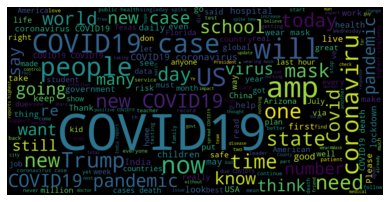

In [ ]:
#VISUALISATION part starts from here

#Plotting the wordcloud 
allwords  = ' '.join([tweets for tweets in twitter_df['Tweet']])
wordcloud = WordCloud(max_font_size=160,width=1200 , height=600,max_words= 200 ).generate(allwords)
plt.imshow(wordcloud, cmap = 'plasma',interpolation='bilinear')
plt.axis('off')
plt.show( )


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


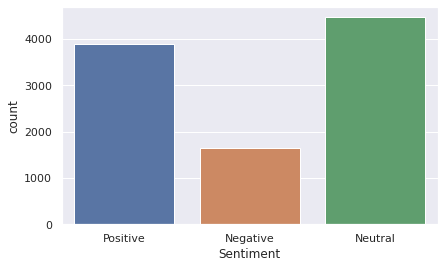

In [ ]:
#plotting COUNTER plot
import seaborn as sns
sns.set(style="darkgrid")
sns.countplot(x='Sentiment', data= twitter_df )

[]

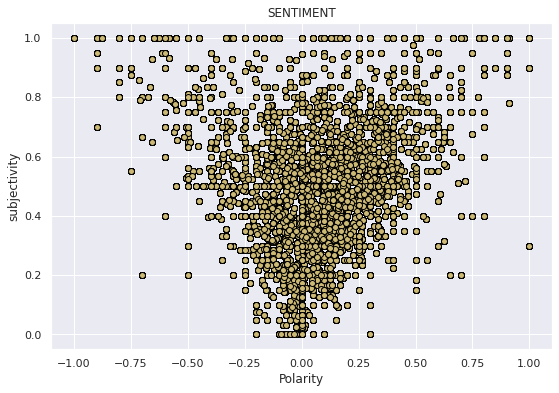

In [ ]:
#plotting polarity and subjectivity
plt.figure(figsize=(8,6) )
#i is basically a total no. of rows
for j in range(0,i):
  plt.scatter(twitter_df['polarity'],twitter_df['subjectivity'],edgecolor='black',cmap='plasma' )
plt.xlabel('Polarity')
plt.ylabel('subjectivity')
plt.title('SENTIMENT')
plt.plot()




In [ ]:
#creating dataframes that consist of only positive,negative and neutral tweets only
twitter_df_pos = twitter_df.loc[twitter_df['Sentiment'] == 'Positive' ]
twitter_df_neg = twitter_df.loc[twitter_df['Sentiment'] == 'Negative' ]
twitter_df_neut = twitter_df.loc[twitter_df['Sentiment'] == 'Neutral' ]

#resetting index
twitter_df_pos.reset_index(drop=True , inplace=True)
twitter_df_neg.reset_index(drop=True , inplace=True)
twitter_df_neut.reset_index(drop=True , inplace=True)




[]

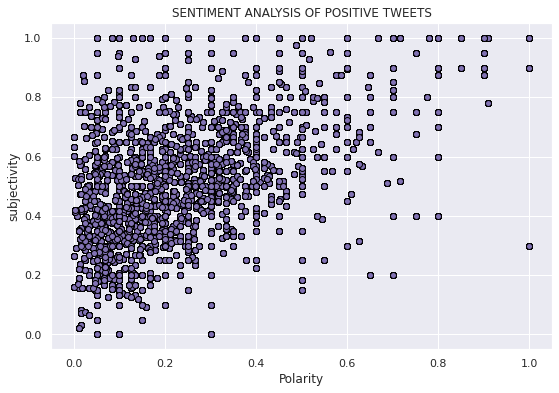

In [ ]:
#polarity vs subjectivity graph of positive tweets
plt.figure(figsize=(8,6) )


for j in range(0,len(twitter_df_pos)):
  plt.scatter(twitter_df_pos['polarity'],twitter_df_pos['subjectivity'],edgecolor='black',cmap='plasma' )
plt.xlabel('Polarity')
plt.ylabel('subjectivity')
plt.title('SENTIMENT ANALYSIS OF POSITIVE TWEETS')
plt.plot()

[]

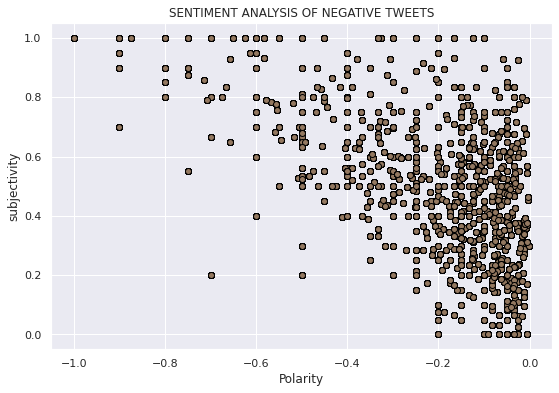

In [ ]:
#polarity vs subjectivity graph of negative tweets
plt.figure(figsize=(8,6) )


for j in range(0,len(twitter_df_neg)):
  plt.scatter(twitter_df_neg['polarity'],twitter_df_neg['subjectivity'],edgecolor='black',cmap='plasma' )
plt.xlabel('Polarity')
plt.ylabel('subjectivity')
plt.title('SENTIMENT ANALYSIS OF NEGATIVE TWEETS')
plt.plot()

[]

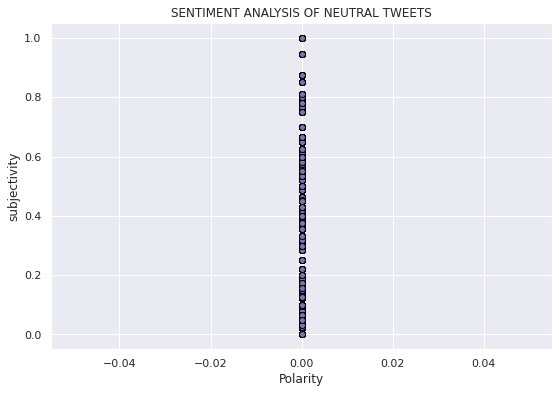

In [ ]:
#polarity vs subjectivity graph of Neutral tweets
plt.figure(figsize=(8,6) )


for j in range(0,len(twitter_df_pos)):
  plt.scatter(twitter_df_neut['polarity'],twitter_df_neut['subjectivity'],edgecolor='black',cmap='plasma' )
plt.xlabel('Polarity')
plt.ylabel('subjectivity')
plt.title('SENTIMENT ANALYSIS OF NEUTRAL TWEETS')
plt.plot()

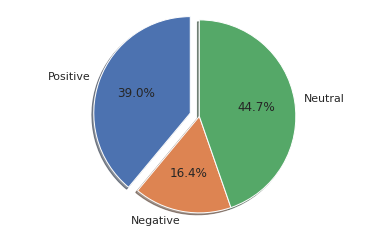

In [ ]:
#plotting pie chart

#calculating the percentage of pos,neg and neut among 10000 tweets
percent_pos  = (len(twitter_df_pos)/len(twitter_df))*100
percent_neg  = (len(twitter_df_neg)/len(twitter_df))*100
percent_neut  = (len(twitter_df_neut)/len(twitter_df))*100

import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Positive', 'Negative', 'Neutral'
sizes = [percent_pos,percent_neg,percent_neut]
explode = (0.1, 0, 0)  # only "explode" the 1st slice (i.e. 'Positive')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
  
def text_process(tweet):
  
  return [word for word in tweet.split() if word.lower() not in stopwords.words('english')]
      
twitter_df['Tweet'].apply(text_process)
twitter_df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,id,Date,Time,Tweet,Retweet_count,polarity,subjectivity,Sentiment
0,1281108228797947904,2020-07-09,06:09:38,Rightly condem the soulless AynRandian Robotro...,0,0.285714,0.535714,Positive
1,1281108212016484352,2020-07-09,06:09:34,Going up stairs without using the banister to ...,0,-0.300000,0.400000,Negative
2,1281108204072497153,2020-07-09,06:09:32,State Health Department reports 149 COVID19 ca...,0,0.000000,0.750000,Neutral
3,1281108192030683136,2020-07-09,06:09:29,But are they refundable if COVID19 is still a...,0,0.080000,0.270000,Positive
4,1281108186209021952,2020-07-09,06:09:28,tiktok instagramreels that’s how who baby jus...,0,0.000000,0.000000,Neutral


In [ ]:
#fitting Tweet data 
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
bow_transfromer = CountVectorizer(analyzer=text_process).fit(twitter_df['Tweet'])


In [ ]:
Tweet_bow = bow_transfromer.transform(twitter_df['Tweet'])

In [ ]:
tfidf_transformer = TfidfTransformer().fit(Tweet_bow)
tweet_tfidf = tfidf_transformer.transform(Tweet_bow)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
tweet_detect = MultinomialNB().fit(tweet_tfidf,twitter_df['Sentiment'])

In [ ]:
tweet_pred = tweet_detect.predict(tweet_tfidf)
pred_df  = pd.DataFrame(tweet_pred,columns=['Prediction'])

net_df = pd.concat([twitter_df['Tweet'],twitter_df['Sentiment'],pred_df],axis = 1)
print(net_df )

                                                  Tweet Sentiment Prediction
0     Rightly condem the soulless AynRandian Robotro...  Positive   Positive
1     Going up stairs without using the banister to ...  Negative    Neutral
2     State Health Department reports 149 COVID19 ca...   Neutral    Neutral
3      But are they refundable if COVID19 is still a...  Positive   Positive
4     tiktok instagramreels that’s how who baby  jus...   Neutral    Neutral
...                                                 ...       ...        ...
9995    Tested negative. For COVID. That’s all. covid19  Negative    Neutral
9996   interestingly I contracted HepC in prison wit...  Positive   Positive
9997  26 Mississippi lawmakers at capital have COVID...  Positive   Positive
9998  Yettrumpet al. wants to have rallies. Covid be...  Positive   Positive
9999  Today was all about smallpox in myDIseaseAndHi...  Negative   Negative

[10000 rows x 3 columns]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
t_train,t_test,s_train,s_test = train_test_split(twitter_df['Tweet'],twitter_df['Sentiment'],test_size = 0.3)


In [ ]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
                     ('bow',CountVectorizer(analyzer=text_process)),
                     ('tfidf', TfidfTransformer()),
                     ('classifier', RandomForestClassifier())
])


In [ ]:
pipeline.fit(t_train,s_train)


Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fe3aed7f598>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.

In [ ]:
cc = pd.concat([t_test,s_test],axis=1)
prediction = pipeline.predict(t_test)
prediction = list(prediction)
cc['pred'] = prediction


print(cc)


                                                  Tweet Sentiment      pred
9190  I signed the letter and hope YOU will toNext s...   Neutral   Neutral
1010  A very good tip if get infected by COVID19Dont...  Positive  Positive
5692  So far 96 daycares in Iowa have had confirmed ...  Positive  Positive
5335  Goodness It's like grilling Gestapostyle rathe...  Positive  Positive
8848  Using social and behavioural science to suppor...  Positive   Neutral
...                                                 ...       ...       ...
3484  The study was inconclusive about whether emplo...   Neutral   Neutral
6736  Rubbish very little to do with luck how is tra...  Negative  Negative
8730  "A growing number of Houston residents are dyi...   Neutral   Neutral
1008  People are sharing their postCOVID19 symptoms ...   Neutral  Positive
9963   Excellent time to remind folks that you need ...  Positive  Positive

[3000 rows x 3 columns]


In [ ]:
from sklearn.metrics import  classification_report
print(classification_report(s_test,prediction))

              precision    recall  f1-score   support

    Negative       0.85      0.34      0.48       463
     Neutral       0.70      0.97      0.82      1336
    Positive       0.87      0.70      0.78      1201

    accuracy                           0.77      3000
   macro avg       0.81      0.67      0.69      3000
weighted avg       0.79      0.77      0.75      3000



In [ ]:
pip install nbconvert

In [ ]:
$ jupyter nbconvert --to HTML Copy_of_2020_part_3point1.ipynb

SyntaxError: ignored